In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
np.random.seed(1000)
first_array = list(np.random.randint(1,100000, 5000))
second_array = list(np.random.randint(1,100000, 10000))
third_array = list(np.random.randint(1,100000, 15000))
fourth_array = list(np.random.randint(1,100000, 20000))
fifth_array = list(np.random.randint(1,100000, 25000))

In [3]:
np.random.seed(1000)
first_array_float = list(np.random.uniform(1,100000, 5000))
second_array_float = list(np.random.uniform(1,100000,10000))
third_array_float = list(np.random.uniform(1,100000, 15000))
fourth_array_float = list(np.random.uniform(1,100000,20000))
fifth_array_float = list(np.random.uniform(1,100000,25000))

In [4]:
combined_integer_arrays = np.array([first_array, second_array, third_array, fourth_array, fifth_array], dtype=object)

In [5]:
sizes = []
for x in combined_integer_arrays:
    size = len(x)
    sizes.append(size)

In [6]:
combined_float_arrays = np.array([first_array_float, second_array_float, third_array_float, fourth_array_float, fifth_array_float], dtype=object)

In [7]:
#Create the selection sort algorithm
def findSmallest(arr):
  smallest = arr[0]
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

In [8]:
#Get integer array sort times with selection sort
sort_runtimes = []
for x in combined_integer_arrays:
    start_time = time.time()
    selectionSort(x)
    runtime = time.time() - start_time
    sort_runtimes.append(runtime*1000)

In [9]:
sort_runtimes

[1231.0972213745117,
 4845.776081085205,
 11231.122732162476,
 20099.90382194519,
 31580.683708190918]

In [10]:
#Get float array sort times with selection sort
sort_float_runtimes = []
for x in combined_float_arrays:
    start_time = time.time()
    selectionSort(x)
    runtime = time.time() - start_time
    sort_float_runtimes.append(runtime*1000)

In [11]:
sort_float_runtimes

[1256.4730644226074,
 4737.545967102051,
 10668.453216552734,
 18907.964944839478,
 29798.102140426636]

In [12]:
data = {'Sizes': sizes, 'Sort Integer Time': sort_runtimes, 'Sort Float Time': sort_float_runtimes}
df = pd.DataFrame(data = data)
df

,Sizes,Sort Integer Time,Sort Float Time
0,5000,1231.097221,1256.473064
1,10000,4845.776081,4737.545967
2,15000,11231.122732,10668.453217
3,20000,20099.903822,18907.964945
4,25000,31580.683708,29798.102140


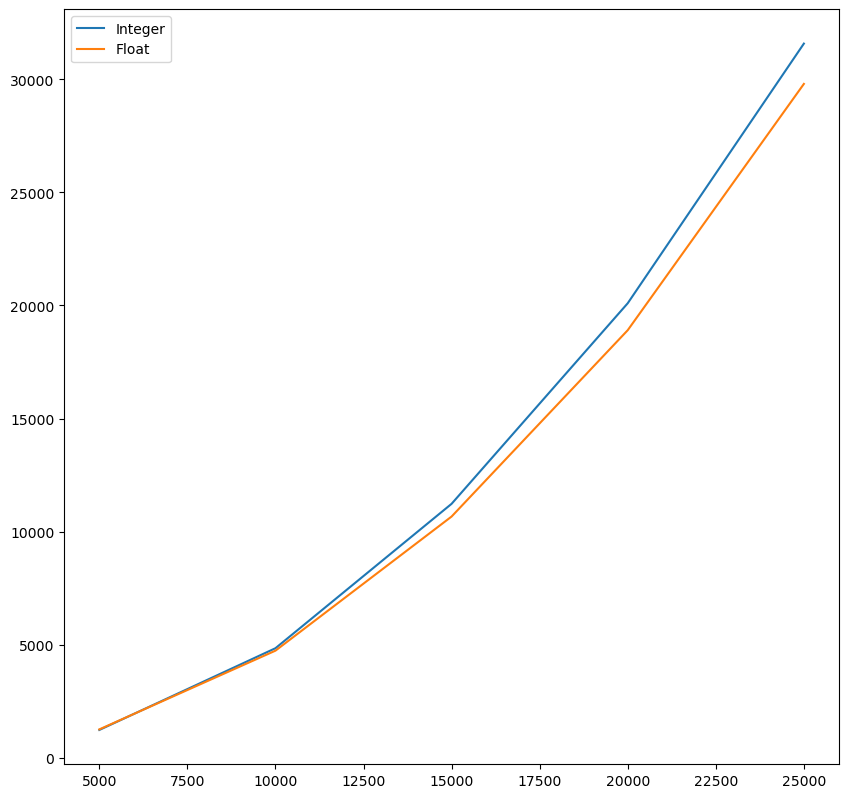

In [15]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(df['Sizes'], df['Sort Integer Time'], label = 'Integer');
plt.plot(df['Sizes'], df['Sort Float Time'], label = 'Float');
plt.legend();

# Executive Summary

## For this experiment I decided took five randomized arrays that were uniformly distributed. These five arrays varied in sizes: 5000, 10000, 15000, 20000, 25000. I created two versions of these arrays, one version had an integer data type while the other had a floating data type.

## To sort these algorithms, I implemented selection sort. The selection sort algorithm utilizes a different function that finds the smallest item in an array. This function works by comparing each number in an array with the previous smallest number. Once that function is implemented the algorithm adds the item to a list, removes the smallest item from the array and loops through the array again and implements the find smallest function.

## The results of implementing this algorithm on both versions of the five arrays were interesting. The algorithm ran similarily on both versions. It's runtime started at 1.2 seconds for both at 5000, grew to 4.8 for integer and 4.7 for float at 10000, ballooned to 11.2 and 10.6 at 15000, continued growing to 20 and 18.9 at 20000, and topped off at 31.5 and 29.7 seconds at 25000. What's clear is that the runtime of the selection sort is growing exponentially as the size of the arrays get bigger. Furthermore, the data shows, with the exception of the first runtime, that float data types perform slightly quicker than integer data types. However, the difference is very small, but perhaps if both continued to grow exponentially the difference would be quite larger.

## This, of course, does relate to Big O notation mainly because the big O notation for the selection sort algorithm is labelled to be O(n^2). This isn't a huge surprise based on the graph that is given. It is quite amazing to see though that no matter the data types used, the pattern of the algorithm will still largely follow this notation.

## In terms of data engineering as a whole this sorting algorithm could be very useful. Sorting values is an important function of many data engineering tasks. It is useful to know not only how an algorithm generally performs, but also how much quicker one data type can be over another. If I were a data engineer that had to use a selection sort algorithm, based on this instance of results, I would say to probably use a floating point data type to increase speed.